In [2]:
df = pd.read_csv('teleco_time_series .csv')

In [3]:
df.isnull().sum()

Day        0
Revenue    0
dtype: int64

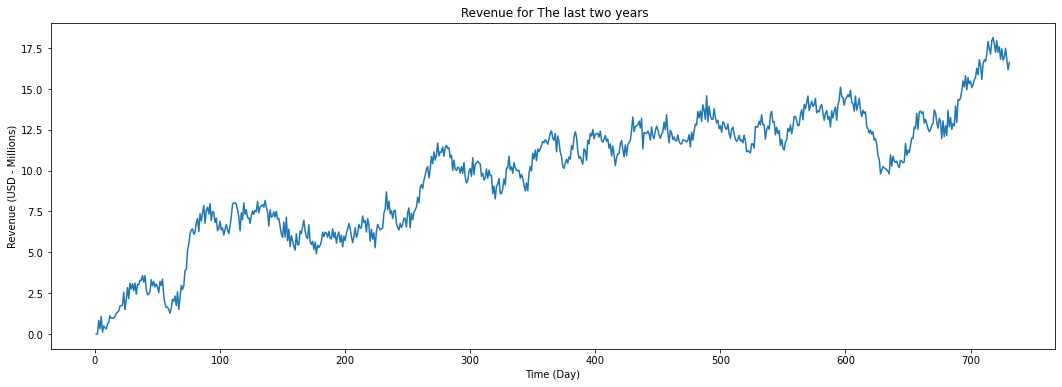

In [4]:
plt.figure(figsize=(18, 6))
plt.plot( df['Day'], df['Revenue'], color='tab:blue')
plt.xlabel('Time (Day)')
plt.ylabel('Revenue (USD - Millions)')
plt.title(' Revenue for The last two years')
plt.show()

In [5]:
df.isnull().sum() #Shows preliminary null values

Day        0
Revenue    0
dtype: int64

In [6]:
df.duplicated() # Check for duplicates

0      False
1      False
2      False
3      False
4      False
       ...  
726    False
727    False
728    False
729    False
730    False
Length: 731, dtype: bool

In [7]:
df.head(5)

,Day,Revenue
0,1,0.000000
1,2,0.000793
2,3,0.825542
3,4,0.320332
4,5,1.082554


In [8]:
# Run stationarity test
# Dickey Fuller Test
result = adfuller(df['Revenue'])
print("p-value:", round(result[1],2))

print("t-statistic:", round(result[0],2))
crit_vals = result[4]
print("critical value of the t-statistic for a 95% confidence level:", round(crit_vals['5%'],2)) 

p-value: 0.32
t-statistic: -1.92
critical value of the t-statistic for a 95% confidence level: -2.87


In [9]:
diff = df.diff().dropna()
result = adfuller(diff['Revenue'])


print("p-value:", round(result[1],2))

print("t-statistic:", round(result[0],2))
crit_vals = result[4]
print("critical value of the t-statistic for a 95% confidence level:", round(crit_vals['5%'],2)) 

p-value: 0.0
t-statistic: -44.87
critical value of the t-statistic for a 95% confidence level: -2.87


In [10]:
# Split data into 80% training and 20% testing
df_train = df.loc[:'584']
df_test = df.loc['585':]

In [11]:
df.to_csv('clean_data')
df_train.to_csv('train_data')
df_test.to_csv('test_data')

(array([6.97387711e+03, 3.91439441e+03, 5.47611144e+01, 1.10791953e+01,
        4.25439684e+00, 8.90767103e+00, 9.32436541e+00, 5.07699490e+00,
        4.50820186e+00, 1.97142105e+00, 3.17930644e+00, 2.05465010e+00,
        1.27856111e-01, 9.12357670e-01, 1.58928494e+00, 1.82600308e+00,
        1.37345831e+00, 1.08602805e+00, 3.71664573e-01, 4.01447712e-01,
        6.67019362e-01, 4.28134847e-01, 1.08303874e+00, 5.05461139e-01,
        1.49612021e-01, 2.01156666e-01, 2.01929017e-01, 3.62482513e-02,
        4.74386760e-01, 5.46619399e-01, 2.44460915e-01, 4.75225583e-01,
        2.85007556e-01, 7.59631735e-02, 2.43183009e-01, 7.19503505e-02,
        3.60475608e-01, 2.18971480e-01, 1.23421972e-01, 1.69234109e-01,
        1.69371921e-01, 1.14748035e-01, 2.14144408e-01, 2.82736486e-01,
        3.17059554e-02, 1.62458482e-02, 3.98324693e-02, 6.38895068e-02,
        4.57061837e-02, 6.54718394e-02, 1.72598760e-01, 1.32802101e-01,
        6.74716970e-02, 1.61089989e-02, 1.42266347e-01, 1.236409

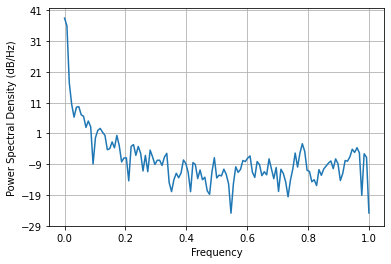

In [12]:
plt.psd(df_train['Revenue'])

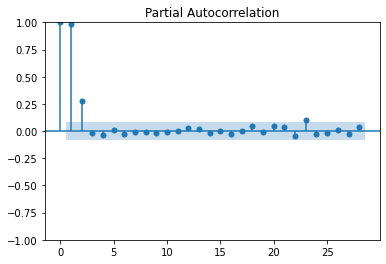

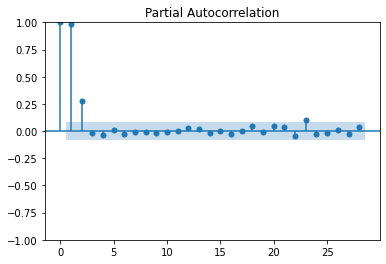

In [13]:
# Referenced https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=551c3203-d37e-4adb-8639-aed60102ce05
plot_pacf(df_train['Revenue'], method='ywm')

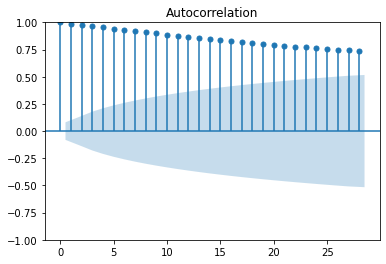

In [14]:
plot_acf(df_train['Revenue']);


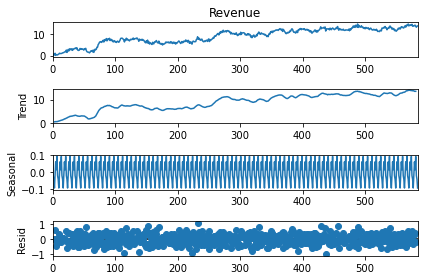

In [15]:
# Decompose the training set
decompose = seasonal_decompose(df_train['Revenue'], model='additive', period=7)
decompose.plot()
plt.show()

Text(0, 0.5, 'Revenue')

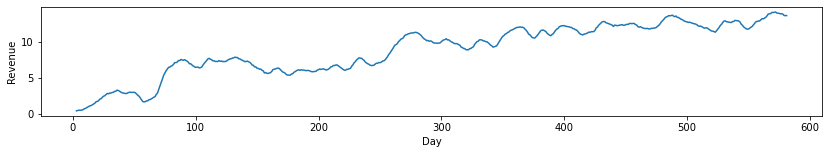

In [16]:
decompose_trend = decompose.trend

ax = decompose_trend.plot(figsize=(14,2))
ax.set_xlabel('Day')
ax.set_ylabel('Revenue')

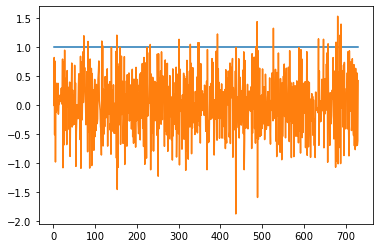

In [17]:
diff_plot = df.diff().dropna()

plt.plot(diff_plot)
plt.show()

In [18]:
print("p-value:", round(result[1],2))

print("t-statistic:", round(result[0],2))
crit_vals = result[4]
print("critical value of the t-statistic for a 95% confidence level:", round(crit_vals['5%'],2)) 

p-value: 0.0
t-statistic: -44.87
critical value of the t-statistic for a 95% confidence level: -2.87


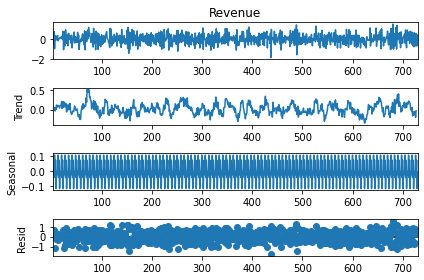

In [19]:
decompose = seasonal_decompose(diff_plot['Revenue'], model='additive', period=7)
decompose.plot()
plt.show()

Text(0, 0.5, 'Revenue')

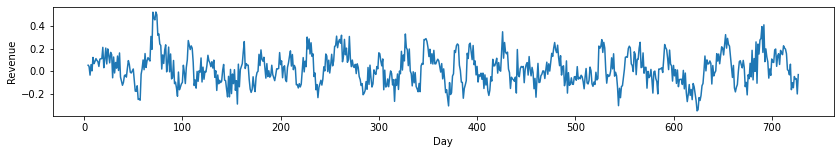

In [20]:
decompose_trend = decompose.trend

ax = decompose_trend.plot(figsize=(14,2))
ax.set_xlabel('Day')
ax.set_ylabel('Revenue')

In [21]:
auto_arima = auto_arima(df['Revenue'], start_P=1, start_q=1, max_p=3, max_q=3, m=12, seasonal=True, d=None, D=1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

auto_arima.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=4.01 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2367.159, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1419.537, Time=0.99 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1969.738, Time=0.74 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2399.547, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1568.311, Time=0.22 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1320.755, Time=1.78 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=7.43 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=3.09 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=2339.965, Time=0.79 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=1147.041, Time=3.24 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=1256.245, Time=1.69 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=5.07 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=3.44 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  731
Model:             SARIMAX(3, 0, 2)x(2, 1, [], 12)   Log Likelihood                -557.405
Date:                             Tue, 06 Sep 2022   AIC                           1132.811
Time:                                     16:24:20   BIC                           1174.012
Sample:                                          0   HQIC                          1148.718
                                             - 731                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0059      0.003      1.787      0.074      -0.001       0.012
ar.L1          1.4330      0.073     19.528      0.000       1.289       1.577
ar.L2         -0.0206      0.125     -0.165      0.869      -0.266       0.224
ar.L3         -0.4235      0.070     -6.071      0.000      -0.560      -0.287
ma.L1         -0.9727      0.082    -11.866      0.000      -1.133      -0.812
ma.L2          0.1046      0.077      1.355      0.175      -0.047       0.256
ar.S.L12      -0.7158      0.038    -18.660      0.000      -0.791      -0.641
ar.S.L24      -0.3879      0.039     -9.861      0.000      -0.465      -0.311
sigma2         0.2725      0.015     17.623      0.000       0.242       0.303
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 1.84
Prob(Q):                              0.85   Prob(JB):                         0.40
Heteroskedasticity (H):               1.07   Skew:                             0.01
Prob(H) (two-sided):                  0.62   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
model = sm.tsa.SARIMAX(df_train['Revenue'], order=(3, 0, 2),seasonal_order=(2, 1, 0, 12), enforce_stationarity=False, enforce_invertibility=False)
SARIMAX_r = model.fit()
# Print results tables
print(SARIMAX_r.summary())

                                      SARIMAX Results                                      
Dep. Variable:                             Revenue   No. Observations:                  585
Model:             SARIMAX(3, 0, 2)x(2, 1, [], 12)   Log Likelihood                -417.885
Date:                             Tue, 06 Sep 2022   AIC                            851.770
Time:                                     16:24:23   BIC                            886.191
Sample:                                          0   HQIC                           865.226
                                             - 585                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3703      0.131     10.478      0.000       1.114       1.627
ar.L2         -0.0560      

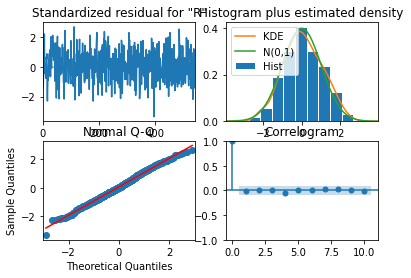

In [23]:
SARIMAX_r.plot_diagnostics()
plt.show()

In [24]:
result = SARIMAX_r.get_forecast()

test_1 = df_test['Revenue'].values.astype('float32')
forecast = result.predicted_mean
print('Expected: %.2f' % forecast)
print('Forecast: %.2f' % test_1[0])
print('Standard Error: %.2f' % result.se_mean)

Expected: 13.16
Forecast: 13.15
Standard Error: 0.52


In [25]:
i = [0.2, 0.1, 0.05, 0.01]
for a in i:
    output = result.conf_int(alpha=a) 
    print('%.1f%% Confidence Interval: %.2f between %.2f and  %.2f' % ((1 - a) * 100, forecast, output['lower Revenue'], output['upper Revenue']))
    

80.0% Confidence Interval: 13.16 between 12.50 and  13.83
90.0% Confidence Interval: 13.16 between 12.31 and  14.02
95.0% Confidence Interval: 13.16 between 12.15 and  14.18
99.0% Confidence Interval: 13.16 between 11.83 and  14.50


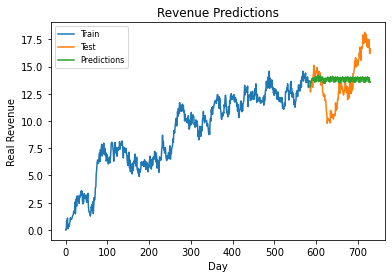

In [26]:
# Training set forcast
prediction = SARIMAX_r.predict(len(df_train), len(df_train) + len(df_test) - 1, typ = 'levels').rename('p')
plt.plot(df_train['Revenue'], label = 'Train')
plt.plot(df_test['Revenue'], label = 'Test')
plt.plot(prediction, label = 'Predictions')
plt.title('Revenue Predictions')
plt.xlabel('Day')
plt.ylabel('Real Revenue')
plt.legend(loc='upper left', fontsize = 8)
plt.show()

<AxesSubplot:>

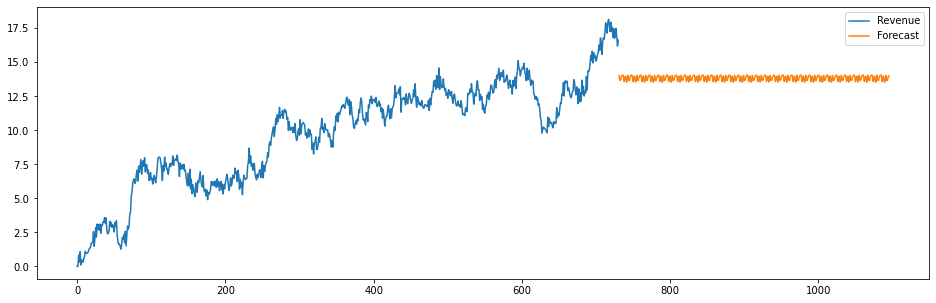

In [27]:
# Final Forecast
forecast = SARIMAX_r.predict(start = len(df['Revenue']), end = (len(df['Revenue']) - 1) + 365, typ = 'level').rename('Forecast')

df['Revenue'].plot(figsize = (16, 5), legend = True)
forecast.plot(legend = True)

In [28]:
RMSE = rmse(df_test['Revenue'], prediction)
print('RMSE: ', round(RMSE, 4))

MSE = mean_squared_error(df_test['Revenue'], prediction)
print('MSE: ', round(MSE, 4))

RMSE:  2.1813
MSE:  4.7579
